In [23]:
import yaml
from src.mdc import CSV_OB, MDC_csv
from src.omc import Order
from src.backtest import Backtest
from pathlib import Path
from src.strategy import BaseStrat
from matplotlib import pyplot as plt
from src.strats.jonrev import JonRev
from src.strats.smart import SMART
import datetime as dt

with open("./configs/test.yml", 'r') as f:
    a = yaml.safe_load(f)
# db = CSV_OB(Path("/Users/ugrek/Desktop/PairTrade/Binance_BTCUSD_11_01.csv"), a['Dataset'])
# strat = [
#     # JonRev(clear_every_step=1021600, active_step=5,  num_pairs=6, w_size=1800,  recal_steps=30, spread=0.005, z=1.4, cooldown_ms=1200_000, order_due_ms=3600_000, trade_amnt=1000),
#     # JonRev(clear_every_step=1021600, active_step=5,  num_pairs=6, w_size=1800,  recal_steps=30, spread=0.005, z=1.8, cooldown_ms=1200_000, order_due_ms=3600_000, trade_amnt=1000),
#     # JonRev(clear_every_step=1021600, active_step=5,  num_pairs=6, w_size=3600,  recal_steps=30, spread=0.005, z=1.4, cooldown_ms=1200_000, order_due_ms=3600_000, trade_amnt=1000),
#     JonRev(max_trend_allowed=-1, clear_every_step=480, active_step=2,  num_pairs=12, w_size=600,  recal_steps=5, spread=0.007, z=2.0, cooldown_ms=60_000, order_due_ms=10800_000, trade_amnt=1000),
#     JonRev(max_trend_allowed=-1, clear_every_step=600, active_step=2,  num_pairs=12, w_size=600,  recal_steps=5, spread=0.005, z=2.0, cooldown_ms=60_000, order_due_ms=10800_000, trade_amnt=1000),
#     JonRev(max_trend_allowed=-1, clear_every_step=480, active_step=2,  num_pairs=12, w_size=1200, recal_steps=5, spread=0.007, z=2.0, cooldown_ms=60_000, order_due_ms=10800_000, trade_amnt=1000),
#     JonRev(max_trend_allowed=-1, clear_every_step=600, active_step=2,  num_pairs=12, w_size=1200, recal_steps=5, spread=0.005, z=2.0, cooldown_ms=60_000, order_due_ms=10800_000, trade_amnt=1000),
# ]

strat = [
    SMART("../data/out_20k_5p.csv", k=2.0, order_due_ms=5400_000,  pair_colld_ms=300_000, enter_due_ms=60_000,  spread=0.005, clear_every_step=240_000),
    SMART("../data/out_20k_5p.csv", k=2.0, order_due_ms=10800_000, pair_colld_ms=300_000, enter_due_ms=60_000, spread=0.005, clear_every_step=240_000),
    SMART("../data/out_20k_5p.csv", k=2.5, order_due_ms=10800_000, pair_colld_ms=300_000, enter_due_ms=60_000,  spread=0.005, clear_every_step=240_000),
    SMART("../data/out_20k_5p.csv", k=3.0, order_due_ms=10800_000, pair_colld_ms=300_000, enter_due_ms=60_000, spread=0.005, clear_every_step=720_000)
]
backtest = Backtest("./configs/test.yml", "./data_3_fin/", strat, "pair_trade")
sharpe = [[] for n in backtest.strat_stats]

In [ ]:
i = 0
while (backtest.step()):
    if i % 10000 == 0:
        print(i)
    i += 1
backtest.run.finish()

0
10000


KeyboardInterrupt: 

Commissions:  0.8501116209920577
Return:  -0.00021273687533825814
Net asset at the end:  -4.254737506765163
Time passed, hours:  38


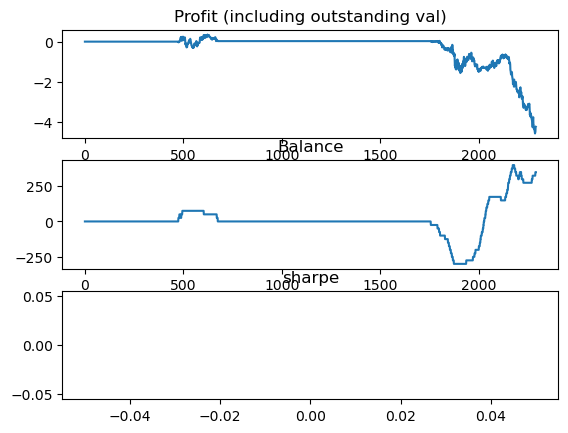

In [4]:
import datetime as dt
s = 3
eval = backtest.strat_stats[s].eval() 
print("Commissions: ", backtest.strat_stats[s].comm)
print("Return: ", eval.Return)
print("Net asset at the end: ", eval.PnL)
print("Time passed, hours: ", (eval.ts[-1] - eval.ts[0]) // 3600_000_000_000)

fig, ax = plt.subplots(3)

ax[0].plot(backtest.strat_stats[s].profit)
ax[0].set_title("Profit (including outstanding val)")
ax[1].plot(backtest.strat_stats[s].base)
ax[1].set_title("Balance")
ax[2].plot(sharpe[s])
ax[2].set_title("sharpe")

plt.show()

In [5]:
len(backtest.strats[0].active_deals)

4

In [19]:
from src.omc import ExecStatus
s = 3
a = [n for n in backtest.strats[s].done_deals if n.enter_status == ExecStatus.FILLED and
                                                n.exit_status == ExecStatus.FILLED]
print(len(a), len(backtest.strats[s].done_deals))
b = [n for n in backtest.strats[s].done_deals if n.enter_status == ExecStatus.FILLED and
                                                n.exit_status == ExecStatus.EXPIRED]
print(len(b), len(backtest.strats[s].done_deals))

c = [n for n in backtest.strats[s].done_deals if n.enter_status == ExecStatus.EXPIRED and
               n.exit_status == ExecStatus.EXPIRED]
print(len(c), len(backtest.strats[s].done_deals))
b

43 67
24 67
0 67


[Deal(id_enter=310915730003701175830085039859807907376, id_exit=249539266940394846852789063349653042654, instr='BTCUSDT', ts=1705108583866000000, enter_status=<ExecStatus.FILLED: 0>, exit_status=<ExecStatus.EXPIRED: 2>, closed_ts=1705119384866000000, curr_qt=0.0),
 Deal(id_enter=94345368165980007848740005054641706780, id_exit=104758091014904172971646592273410649345, instr='BTCUSDT', ts=1705108883866000000, enter_status=<ExecStatus.FILLED: 0>, exit_status=<ExecStatus.EXPIRED: 2>, closed_ts=1705119684866000000, curr_qt=0.0),
 Deal(id_enter=294297857812336384753666331657608570052, id_exit=82688732938993423367259428736372228698, instr='BTCUSDT', ts=1705184620866000000, enter_status=<ExecStatus.FILLED: 0>, exit_status=<ExecStatus.EXPIRED: 2>, closed_ts=1705195421866000000, curr_qt=0.0),
 Deal(id_enter=38751755589207974200270081909424243367, id_exit=163140168124114880431526031607362547631, instr='BTCUSDT', ts=1705186644866000000, enter_status=<ExecStatus.FILLED: 0>, exit_status=<ExecStatus.E

43047.96244335937 43241.581464843744 0.9955223880597015 180.0


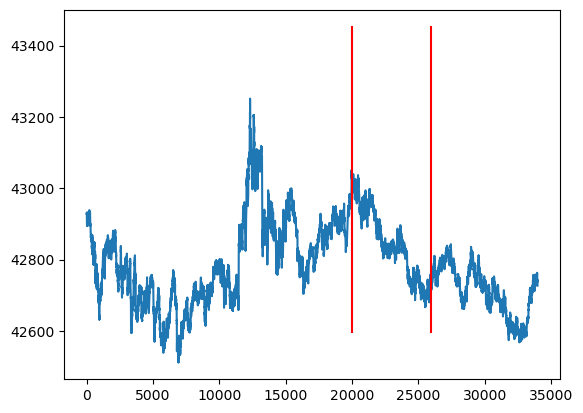

In [14]:
sample = b[20]
# backtest.strats[s].vte_i
in_ord = [n for n in backtest.strat_stats[s].matchRes if n.order.id == sample.id_enter][0]
ex_ord = [n for n in backtest.strat_stats[s].matchRes if n.order.id == sample.id_exit][0]
print(in_ord.order.px, ex_ord.order.px, in_ord.order.px / ex_ord.order.px, (ex_ord.ts - in_ord.ts) / 60_000_000_000)
ds = backtest.mdc.dfs[backtest.mdc.names[in_ord.order.name]].df
ts = ds.o_ts_exch.loc[ds.o_ts_exch < in_ord.ts].shape[0]
ts_end = ds.o_ts_exch.loc[ds.o_ts_exch < sample.closed_ts].shape[0]
look_back = 20000
look_fwd = 8000
plt.plot(ds.iloc[ts-look_back:ts_end+look_fwd]["o_ask_px_1"].values)
plt.vlines(look_back, ds.iloc[ts].o_ask_px_1 * 1.01, ds.iloc[ts].o_ask_px_1 * 0.99, color="red")
plt.vlines(look_back + ts_end - ts, ds.iloc[ts].o_ask_px_1 * 1.01, ds.iloc[ts].o_ask_px_1 * 0.99, color="red")

In [10]:
import pandas as pd
df_1 = backtest.mdc.dfs[0].df.loc[:, ["o_ts_exch", "o_ask_px_1"]]
df_1["o_ts_exch"] //= 1000000000
df_2 = backtest.mdc.dfs[1].df.loc[:, ["o_ts_exch", "o_ask_px_1"]]
df_2["o_ts_exch"] //= 1000000000
df_12  = pd.merge(df_1.loc[:, ["o_ts_exch", "o_ask_px_1"]], 
         df_2.loc[:, ["o_ts_exch", "o_ask_px_1"]], on="o_ts_exch")

vte = pd.read_csv("../data/out_20k_5p.csv")
vte["ts"] = (vte["ts"] / 1000).astype(int)

df_merged = pd.merge(df_12, vte, left_on="o_ts_exch", right_on="ts")
df_merged.ffill(inplace=True)
df_merged["Portfolio"] = df_merged["o_ask_px_1_x"] - df_merged["ratio1"] * df_merged["o_ask_px_1_y"]
df_merged

,o_ts_exch,o_ask_px_1_x,o_ask_px_1_y,i,ts,kappa1,vol1,theta1,stdKappa1,ratio1,...,stdKappa4,ratio4,resFlag4,kappa5,vol5,theta5,stdKappa5,ratio5,resFlag5,Portfolio
0,1705099161,42319.9,0.5401,20004,1705099161,0.000171,8.388795,-128.558015,0.000131,78512.361160,...,NaN,537670.512736,0.0,NaN,NaN,NaN,NaN,5622.028806,2.541509e+09,-84.626263
1,1705099161,42320.0,0.5401,20004,1705099161,0.000171,8.388795,-128.558015,0.000131,78512.361160,...,NaN,537670.512736,0.0,NaN,NaN,NaN,NaN,5622.028806,2.541509e+09,-84.526263
2,1705099161,42319.0,0.5401,20004,1705099161,0.000171,8.388795,-128.558015,0.000131,78512.361160,...,NaN,537670.512736,0.0,NaN,NaN,NaN,NaN,5622.028806,2.541509e+09,-85.526263
3,1705099162,42320.0,0.5402,20005,1705099162,0.000167,8.402466,-128.560447,0.000129,78512.361160,...,NaN,537670.512736,0.0,NaN,NaN,NaN,NaN,5622.028806,2.541509e+09,-92.377499
4,1705099162,42320.0,0.5403,20005,1705099162,0.000167,8.402466,-128.560447,0.000129,78512.361160,...,NaN,537670.512736,0.0,NaN,NaN,NaN,NaN,5622.028806,2.541509e+09,-100.228735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486948,1706001846,39228.0,0.4625,922689,1706001846,-0.000056,2.954084,405.738577,0.000070,82525.494891,...,0.000155,492332.996853,8.0,-0.000038,3.928057,335.054011,0.00012,6221.941748,8.000000e+00,1059.958613
486949,1706001847,39228.1,0.4624,922690,1706001847,-0.000053,2.937340,405.788497,0.000070,82525.494891,...,0.000155,492332.996853,8.0,-0.000038,3.928057,335.054011,0.00012,6221.941748,8.000000e+00,1068.311162
486950,1706001847,39229.1,0.4624,922690,1706001847,-0.000053,2.937340,405.788497,0.000070,82525.494891,...,0.000155,492332.996853,8.0,-0.000038,3.928057,335.054011,0.00012,6221.941748,8.000000e+00,1069.311162
486951,1706001847,39232.8,0.4624,922690,1706001847,-0.000053,2.937340,405.788497,0.000070,82525.494891,...,0.000155,492332.996853,8.0,-0.000038,3.928057,335.054011,0.00012,6221.941748,8.000000e+00,1073.011162


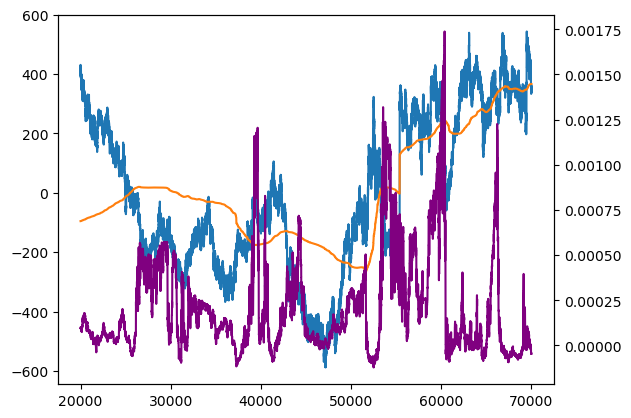

In [22]:
sample = 20000
l      = 50000
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(df_merged.loc[sample:sample+l, "kappa1"], c="purple")
ax.plot(df_merged.loc[sample:sample+l, "Portfolio"])
ax.plot(df_merged.loc[sample:sample+l, "theta1"])

plt.show()

In [45]:
vte = pd.read_csv("../data/out_20k_5p.csv")


0         1705099
1         1705099
2         1705099
3         1705099
4         1705099
           ...   
660897    1706001
660898    1706001
660899    1706001
660900    1706001
660901    1706001
Name: ts, Length: 660902, dtype: int32

In [ ]:
s = 0
instr = {}

for deal in backtest.strats[s].done_deals:
    if deal.instr not in instr.keys():
        instr[deal.instr] = [0, 0, 0]
    instr[deal.instr][1] += 1
    if deal.enter_status == ExecStatus.FILLED and deal.exit_status == ExecStatus.FILLED:
        instr[deal.instr][0] += 1
    
    instr[deal.instr][2] = instr[deal.instr][0] / instr[deal.instr][1]

instr

{'AVAXUSD_PERP': [136, 136, 1.0],
 'DOGEUSD_PERP': [228, 228, 1.0],
 'ETHUSDT': [339, 341, 0.9941348973607038],
 'BNBUSD_PERP': [154, 154, 1.0],
 'BTCUSDT': [100, 103, 0.970873786407767]}

(array([1430.,  277.,  101.,   39.,   10.,    2.,   14.,    0.,    0.,
          28.]),
 array([1.20004000e+02, 2.13127104e+04, 4.25054168e+04, 6.36981232e+04,
        8.48908296e+04, 1.06083536e+05, 1.27276242e+05, 1.48468949e+05,
        1.69661655e+05, 1.90854362e+05, 2.12047068e+05]),
 <BarContainer object of 10 artists>)

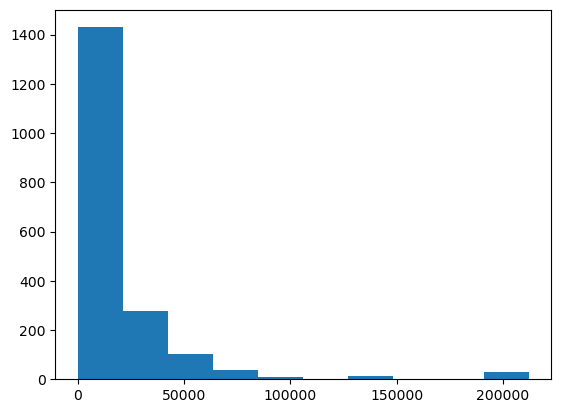

In [ ]:
import numpy as np
plt.hist(np.array([n.closed_ts - n.ts for n in a]) / 1_000_000_000)

In [ ]:
backtest.strats[0].closing_ids

[]

In [ ]:
backtest.strat_stats[2].matchRes[2268:2280]
[n for n in backtest.strats[2].done_deals if n.id_enter == 60135998781967854275594868799989869587]

[Deal(id_enter=60135998781967854275594868799989869587, id_exit=216774430434634074390126252889921467566, instr='ETHUSD_PERP', ts=1705099813866000000, enter_status=<ExecStatus.EXPIRED: 2>, exit_status=<ExecStatus.CANCELED: 3>, closed_ts=1705099814866000000)]

In [ ]:
backtest.mdc.names

{'ADAUSD_PERP': 0,
 'AVAXUSD_PERP': 1,
 'BNBUSD_PERP': 2,
 'BTCUSD_PERP': 3,
 'DOGEUSD_PERP': 4,
 'DOTUSD_PERP': 5,
 'ETHUSD_PERP': 6,
 'FILUSD_PERP': 7,
 'LINKUSD_PERP': 8,
 'OPUSD_PERP': 9,
 'SOLUSD_PERP': 10,
 'XRPUSD_PERP': 11,
 'BTCUSDT': 12,
 'ETHUSDT': 13}

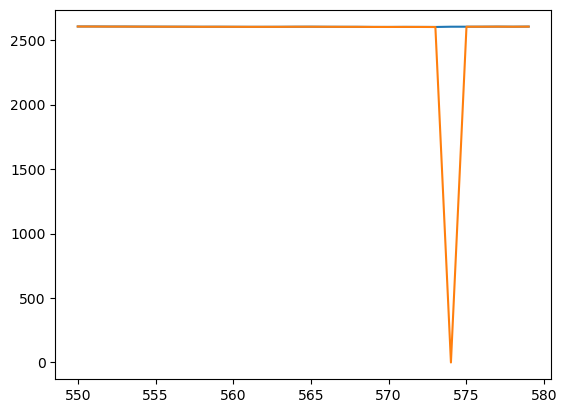

In [ ]:
s = 6
plt.plot(backtest.mdc.dfs[s].df.o_ask_px_3[550:580])
plt.plot(backtest.mdc.dfs[s].df.o_bid_px_3[550:580])

In [ ]:
backtest.omc.orders = []
backtest.omc.compose_order(0.01, 0.5, True, "BTCUSD_PERP")
print(backtest.omc.orders)
backtest.omc.match_orders(1706094786886000000)

[Order(px=0.01, qt=0.5, side_ask=True, name='BTCUSD_PERP', ts=1705123081886000000, id=0, FoK=False, strat_id=0, exec_time=-1)]


[MatchRes(amnt=21411.75, qt=0.5, comm=10.705875, order=Order(px=0.01, qt=0.0, side_ask=True, name='BTCUSD_PERP', ts=1705123081886000000, id=0, FoK=False, strat_id=0, exec_time=-1), status=<ExecStatus.FILLED: 0>, ts=1705123081866000000)]

In [ ]:
import os
import pandas as pd
PREFIX = "./data_1/"

files = os.listdir(PREFIX)
for n in files:
    ds = pd.read_csv(PREFIX + n)
    ds = ds.loc[ds["t_flag"] == 0]
    ds.to_csv(PREFIX + "--" + n)

In [ ]:
import os
import pandas as pd

ds = pd.read_csv("./data_1/--BinanceFutC_BNBUSD_PERP_Binance_FutC_PERPETUAL.csv")["timestamp"].

,Unnamed: 0,id,timestamp,o_ts_recv,o_ts_exch,t_flag,t_px,t_qt,o_dep_ask,o_dep_bid,...,o_bid_px_198,o_bid_qt_198,o_ask_px_199,o_ask_qt_199,o_bid_px_199,o_bid_qt_199,o_ask_px_200,o_ask_qt_200,o_bid_px_200,o_bid_qt_200
0,4,4,2024-01-12 17:05:57.433289,2024-01-12 17:05:57.432719,2024-01-12 17:05:57.205,0,0.0,0.0,96,106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,6,2024-01-12 17:05:57.981823,2024-01-12 17:05:57.980978,2024-01-12 17:05:57.497,0,0.0,0.0,95,109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,7,2024-01-12 17:05:58.388840,2024-01-12 17:05:58.388324,2024-01-12 17:05:57.819,0,0.0,0.0,99,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,15,2024-01-12 17:05:58.572532,2024-01-12 17:05:58.571715,2024-01-12 17:05:58.074,0,0.0,0.0,94,118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19,19,2024-01-12 17:05:59.569874,2024-01-12 17:05:59.569170,2024-01-12 17:05:58.765,0,0.0,0.0,101,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121198,143689,143689,2024-01-15 08:38:49.196969,2024-01-15 08:38:49.196172,2024-01-15 08:38:49.051,0,0.0,0.0,142,169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121199,143690,143690,2024-01-15 08:38:54.617451,2024-01-15 08:38:54.616537,2024-01-15 08:38:54.466,0,0.0,0.0,140,165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121200,143691,143691,2024-01-15 08:38:54.713854,2024-01-15 08:38:54.712930,2024-01-15 08:38:54.560,0,0.0,0.0,138,144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121201,143692,143692,2024-01-15 08:38:55.232666,2024-01-15 08:38:55.232053,2024-01-15 08:38:55.090,0,0.0,0.0,140,163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
backtest.step()
print(backtest.mdc.dfs[0].get_line(3))
print(backtest.mdc.dfs[1].get_line(3))
print(backtest.mdc.get_upded_labels())
print(backtest.mdc.get_all_lines())
print(backtest.omc.match_orders(1702911215551000000))
print(backtest.omc.orders)